[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\antoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


📊 Dataset Shape: (1552, 2)
                                              review sentiment
0  Oh, and gorgeously animated.I think that's a f...  positive
1  The story of the "founder" of Mc Donald's and ...  positive
2  Deepwater Horizon is apparently based on the t...  positive
3  First off, the movie is beautiful to look at a...  positive
4  Oh dear, another gaming movie bites the dust, ...  negative

Sentiment Distribution:
 sentiment
positive    1304
negative     248
Name: count, dtype: int64

🔄 Preprocessing dataset...
                                              review  \
0  Oh, and gorgeously animated.I think that's a f...   
1  The story of the "founder" of Mc Donald's and ...   
2  Deepwater Horizon is apparently based on the t...   
3  First off, the movie is beautiful to look at a...   
4  Oh dear, another gaming movie bites the dust, ...   

                                    processed_review sentiment  
0  gorgeously animatedi think thats fair way sum ...  positive  
1  s

C:\Users\antoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


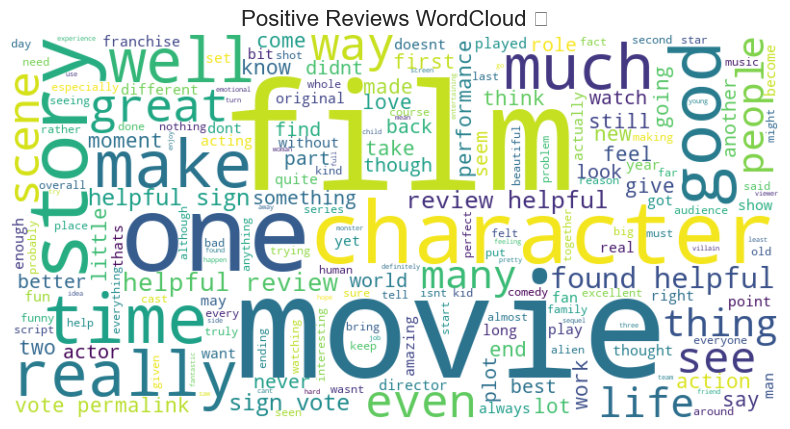

C:\Users\antoj\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


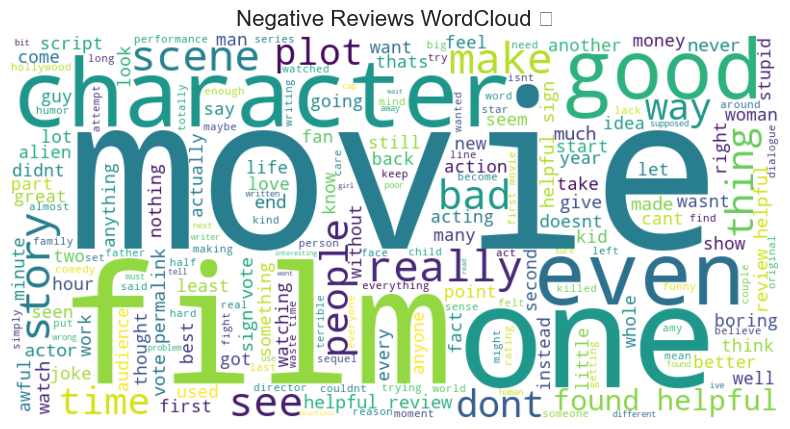


🔄 Training Logistic Regression...
✅ Logistic Regression → Test Accuracy: 0.8457

🔄 Training Naive Bayes...
✅ Naive Bayes → Test Accuracy: 0.8392

🔄 Training Random Forest...
✅ Random Forest → Test Accuracy: 0.8553

🔄 Training Linear SVM...
✅ Linear SVM → Test Accuracy: 0.8778

📊 Model Comparison:
                      Test Accuracy
Logistic Regression       0.845659
Naive Bayes               0.839228
Random Forest             0.855305
Linear SVM                0.877814

🏆 Best Model: Linear SVM

Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.42      0.53        50
    positive       0.90      0.97      0.93       261

    accuracy                           0.88       311
   macro avg       0.80      0.69      0.73       311
weighted avg       0.87      0.88      0.86       311



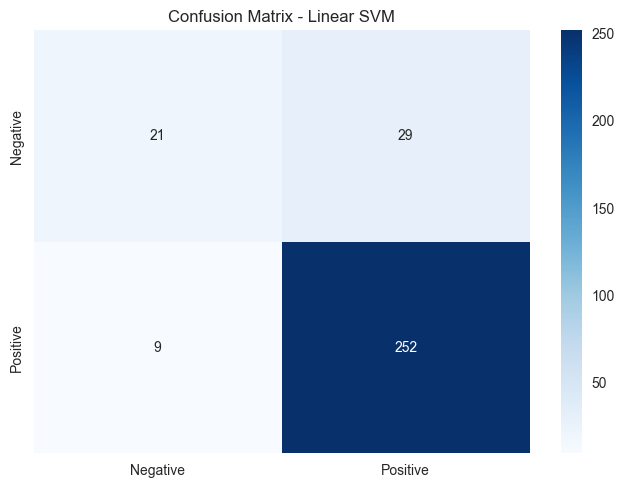


🎤 Interactive Sentiment Analysis (type 'quit' to exit)



Enter a review:  movie was fantastic


Prediction: POSITIVE



Enter a review:  it was a terrible movie


Prediction: NEGATIVE



Enter a review:  quit


👋 Exiting sentiment analysis.


In [1]:
# ============================
# 1. Setup & Imports
# ============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import joblib

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# NLTK downloads
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================
# 2. Load Dataset
# ============================
# Change this path to where your dataset is stored
df = pd.read_csv(r"C:\Users\antoj\Downloads\test_set.csv\test_set.csv")

# Rename columns if needed
if "Review_body" in df.columns and "Sentiment" in df.columns:
    df = df.rename(columns={"Review_body": "review", "Sentiment": "sentiment"})

# Map dataset-specific sentiment labels → binary
sentiment_map = {
    "Exceptional": "positive",
    "Recommend": "positive",
    "Decent": "positive",
    "Abysmal": "negative",
    "Skip": "negative"
}
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Drop rows with unmapped labels (just in case)
df = df.dropna(subset=["sentiment", "review"])

print(f"📊 Dataset Shape: {df.shape}")
print(df.head())
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())

# ============================
# 3. Preprocessing Functions
# ============================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<[^>]+>', '', text)      
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

print("\n🔄 Preprocessing dataset...")
df["processed_review"] = df["review"].apply(preprocess_text)
print(df[["review", "processed_review", "sentiment"]].head(5))

# ============================
# 4. WordClouds
# ============================
def create_wordcloud(text, title):
    if not text.strip():
        return
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

positive_text = " ".join(df[df["sentiment"]=="positive"]["processed_review"])
negative_text = " ".join(df[df["sentiment"]=="negative"]["processed_review"])

create_wordcloud(positive_text, "Positive Reviews WordCloud ☀")
create_wordcloud(negative_text, "Negative Reviews WordCloud ⛈")

# ============================
# 5. Train/Test Split
# ============================
X = df["processed_review"]
y = df["sentiment"]

if len(df) < 10:
    test_size = 0.4
    stratify = None
else:
    test_size = 0.2
    stratify = y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=stratify, random_state=42
)

max_features = 500 if len(df) < 1000 else 5000
tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,2), min_df=1, max_df=0.95)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ============================
# 6. Models
# ============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Linear SVM": LinearSVC(random_state=42)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model

    y_pred = model.predict(X_test_tfidf)
    results[name] = {
        "Test Accuracy": accuracy_score(y_test, y_pred)
    }
    print(f"✅ {name} → Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:\n", results_df)

# ============================
# 7. Best Model & Evaluation
# ============================
best_model_name = results_df["Test Accuracy"].idxmax()
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
y_pred = best_model.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# Save
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, f"models/best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")

# ============================
# 8. Prediction Function
# ============================
def predict_sentiment(text):
    if not text.strip():
        return "Neutral", 0.0
    processed = preprocess_text(text)
    vector = tfidf.transform([processed])
    pred = best_model.predict(vector)[0]
    return pred, 0.0  # LinearSVC doesn’t give confidence

# Interactive loop
print("\n🎤 Interactive Sentiment Analysis (type 'quit' to exit)\n")
while True:
    user_input = input("Enter a review: ")
    if user_input.lower() == "quit":
        print("👋 Exiting sentiment analysis.")
        break
    sentiment, _ = predict_sentiment(user_input)
    print(f"Prediction: {sentiment.upper()}\n")
